# Questão 1

Considere os dados apresentados na tabela abaixo. Determine os centroides dos aglomerados "clusters" presentes nos dados, fazendo uso do algoritmo K-means. Para tanto considere os itens (a) - (c) referentes ao processo de inicialização:

### (a) Considere que existam três clusters e a inicialização dos centros seja aleatória
### (b) Considere que existam três clusters e a inicialização dos centros seja dada por

$m1=(0,0,0)^t$

$m2=(0,-1,-1)^t$

$m3=(1,1,2)^t$

### (c) Repita o item a considerando que os centros iniciais sejam 

$m1=(-0.1,0,-0.1)^t$

$m2=(0,-2,-3)^t$

$m3=(1,-3,-5)^t$

### Compare o resultado obtido com o item (a) e explique a razão da diferenças, incluindo o número de interações para alcançar a convergência.


## Import das bibliotecas e exibição do dataset

In [52]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = './data.csv'
data = pd.read_csv(file_path)

# Exibir os dados carregados
print(data) 
print(data.shape)

    Amostra    x1    x2    x3
0         1  7.82 -4.58 -3.97
1         2 -6.68  3.16  2.71
2         3  4.36  2.19  2.09
3         4  6.72  0.88  2.80
4         5 -8.64 -3.06  3.50
5         6 -6.87  0.57 -5.45
6         7  4.47 -2.62  5.76
7         8  6.73 -2.01  4.18
8         9 -7.71  2.34 -6.33
9        10 -6.91 -0.49 -5.68
10       11  6.18 -2.81  5.82
11       12  6.72 -0.93 -4.04
12       13 -6.25 -0.26  0.56
13       14 -6.94 -1.22  1.13
14       15  8.09  0.20  2.25
15       16  6.81  0.17 -4.15
16       17 -5.19  4.24  4.04
17       18 -6.38 -1.74  1.43
18       19  4.08  1.30  5.33
19       20  6.27  0.93 -2.78
(20, 4)


## Removendo a primeira linha e coluna para trabalhar apenas com os dados numéricos

In [53]:
data_points = data[['x1', 'x2', 'x3']].values
print(data_points)

[[ 7.82 -4.58 -3.97]
 [-6.68  3.16  2.71]
 [ 4.36  2.19  2.09]
 [ 6.72  0.88  2.8 ]
 [-8.64 -3.06  3.5 ]
 [-6.87  0.57 -5.45]
 [ 4.47 -2.62  5.76]
 [ 6.73 -2.01  4.18]
 [-7.71  2.34 -6.33]
 [-6.91 -0.49 -5.68]
 [ 6.18 -2.81  5.82]
 [ 6.72 -0.93 -4.04]
 [-6.25 -0.26  0.56]
 [-6.94 -1.22  1.13]
 [ 8.09  0.2   2.25]
 [ 6.81  0.17 -4.15]
 [-5.19  4.24  4.04]
 [-6.38 -1.74  1.43]
 [ 4.08  1.3   5.33]
 [ 6.27  0.93 -2.78]]


## Aplicando k-means

### Função para aplicar k-means e número de iterações

In [54]:
def kmeans_analysis(data, init_centroids, n_clusters=3, random_init=False):
    if random_init:
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1, max_iter=300, random_state=42)
    else:
        kmeans = KMeans(n_clusters=n_clusters, init=np.array(init_centroids), n_init=1, max_iter=300)
    
    kmeans.fit(data)
    return kmeans.cluster_centers_, kmeans.n_iter_, kmeans.labels_

## Função para plotar os dados e clusters

In [55]:
def plot_clusters(data, centroids, labels, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['r', 'g', 'b']
    
    # Plotar cada ponto com sua cor de cluster
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
                   c=colors[i], label=f'Cluster {i+1}', s=50, alpha=0.6)
    
    # Plotar os centroides
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               c='k', marker='x', s=200, label='Centroids', linewidths=3)
    
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    ax.legend()
    plt.show()

### Letra (a)

[[-6.68        0.18666667  2.22833333]
 [-7.16333333  0.80666667 -5.82      ]
 [ 6.20454545 -0.66181818  1.20818182]]
5


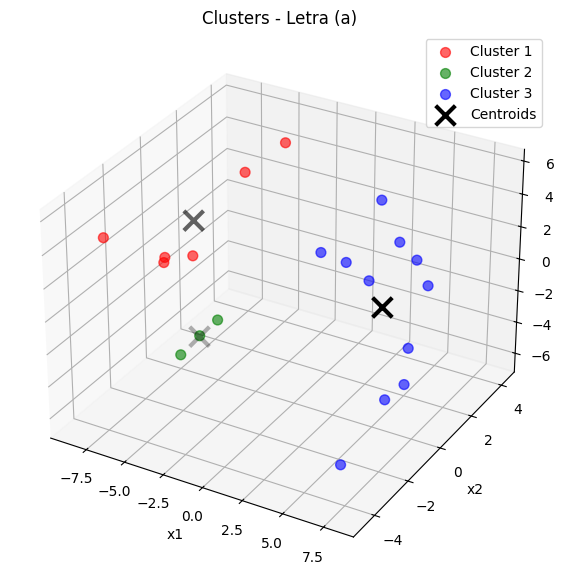

In [56]:
centroids_a, iterations_a, labels_a = kmeans_analysis(data_points, None, random_init=True)

print(centroids_a) 
print(iterations_a)

plot_clusters(data_points, centroids_a, labels_a, title='Clusters - Letra (a)')


### Letra (b)

[[-6.84111111  0.39333333 -0.45444444]
 [ 6.905      -1.1025     -3.735     ]
 [ 5.80428571 -0.41        4.03285714]]
3


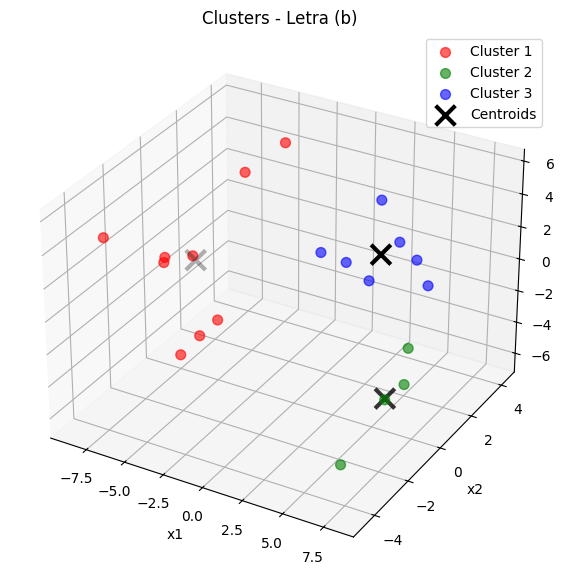

In [57]:
centroids_b, iterations_b, labels_b = kmeans_analysis(data_points, [[0, 0, 0], [0, -1, -1], [1, 1, 2]])
print(centroids_b)
print(iterations_b)

plot_clusters(data_points, centroids_b, labels_b, title='Clusters - Letra (b)')

### Letra (c)

[[ 5.80428571 -0.41        4.03285714]
 [-6.84111111  0.39333333 -0.45444444]
 [ 6.905      -1.1025     -3.735     ]]
6


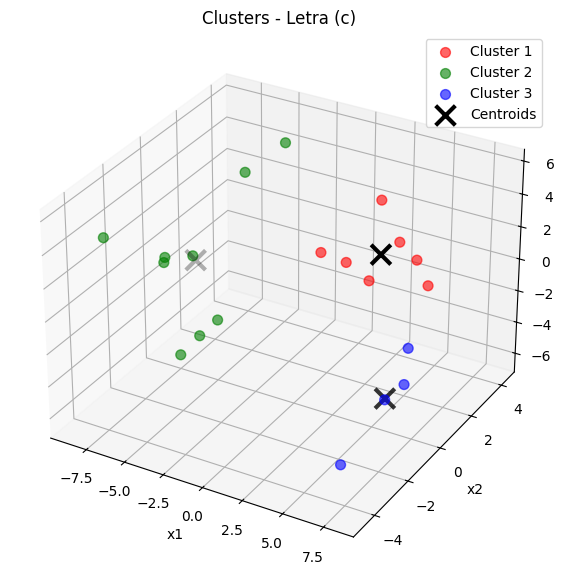

In [58]:
centroids_c, iterations_c, labels_c = kmeans_analysis(data_points, [[-0.1, 0, -0.1], [0, -2, -3], [1, -3, -5]])
print(centroids_c) 
print(iterations_c)

plot_clusters(data_points, centroids_c, labels_c, title='Clusters - Letra (c)')

# Compração de resultados

Na inicialização aleatória do item (a), o algorítmo convergiu com 5 iterações.

Na inicialização do item (b), o algorítmo convergiu com 3 iterações.

Na inicialização do item (c), o algorítmo convergiu com 6 iterações.

Essa diferença na convergência ocorre devido aos centrois escolhidos estarem mais próximos ou mais distantes dos centroides reais dos dados.
No item (b), o centroide inicial escolhido foi o mais próximo do centroide real, e por isso houveram mais iterações. Já no item (a) e (c) os centroides escolhidos estavam mais distantes.